In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from PIL import Image, ImageOps
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [3]:
images = []
ages = []
genders = []
races = []

for i in os.listdir('crop_part1')[0:8000]:
    split = i.split('_')
    ages.append(int(split[0]))
    genders.append(int(split[1]))
    races.append(str(split[2]))
    images.append(Image.open('crop_part1/' + i))

In [4]:
images = pd.Series(list(images), name = 'Images')
ages = pd.Series(list(ages), name = 'Ages')
genders = pd.Series(list(genders), name = 'Genders')
races=pd.Series(list(races), name = 'Races')
df = pd.concat([images, ages, genders,races], axis=1)
df

,Images,Ages,Genders,Races
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,100,1,0
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,100,1,2
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,101,1,2
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,10,0,0
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,10,0,0
...,...,...,...,...
7995,<PIL.JpegImagePlugin.JpegImageFile image mode=...,63,1,0
7996,<PIL.JpegImagePlugin.JpegImageFile image mode=...,63,1,0
7997,<PIL.JpegImagePlugin.JpegImageFile image mode=...,63,1,0
7998,<PIL.JpegImagePlugin.JpegImageFile image mode=...,63,1,0


In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Races']=le.fit_transform(df['Races'])
df['Races']

0       0
1       2
2       2
3       0
4       0
       ..
7995    0
7996    0
7997    0
7998    0
7999    0
Name: Races, Length: 8000, dtype: int32

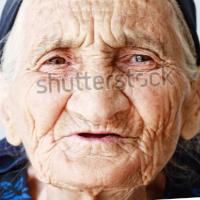

100 1 0


In [6]:
display(df['Images'][0])
print(df['Ages'][0], df['Genders'][0],df['Races'][0])

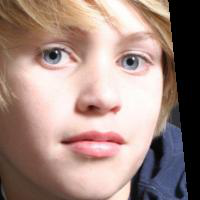

10 0 0


In [7]:
display(df['Images'][10])
print(df['Ages'][10], df['Genders'][10],df['Races'][10])

C:\Users\ilhancuvelek\anaconda3\envs\new_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Ages', ylabel='Density'>

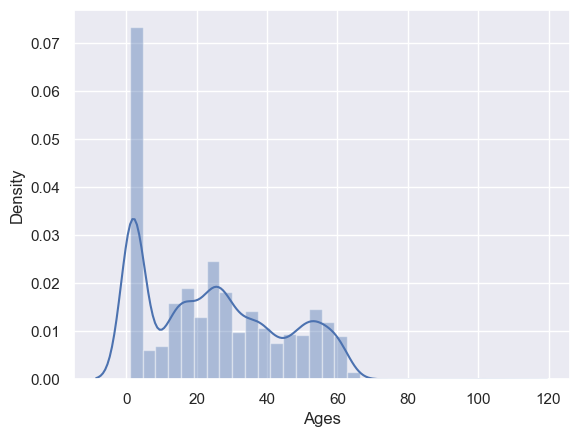

In [8]:
sns.set_theme()
sns.distplot(df['Ages'],kde=True, bins=30)

In [9]:
under4s = []

for i in range(len(df)):
    if df['Ages'].iloc[i] <= 4:
        under4s.append(df.iloc[i])
under4s = pd.DataFrame(under4s)
under4s = under4s.sample(frac=0.3)

df = df[df['Ages'] > 4]

df = pd.concat([df, under4s], ignore_index = True)

C:\Users\ilhancuvelek\anaconda3\envs\new_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Ages', ylabel='Density'>

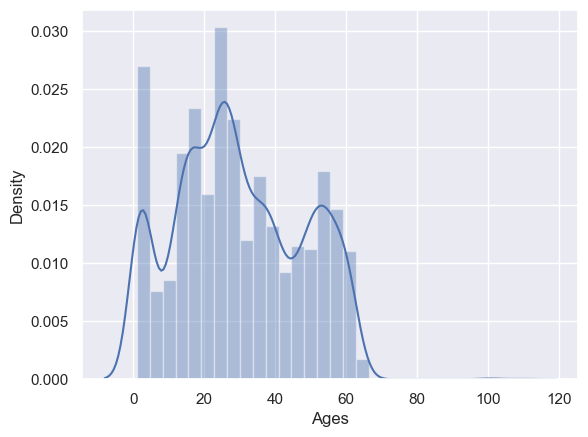

In [10]:
sns.distplot(df['Ages'],kde=True, bins=30)

In [11]:
df = df[df['Ages'] < 80]

C:\Users\ilhancuvelek\anaconda3\envs\new_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Ages', ylabel='Density'>

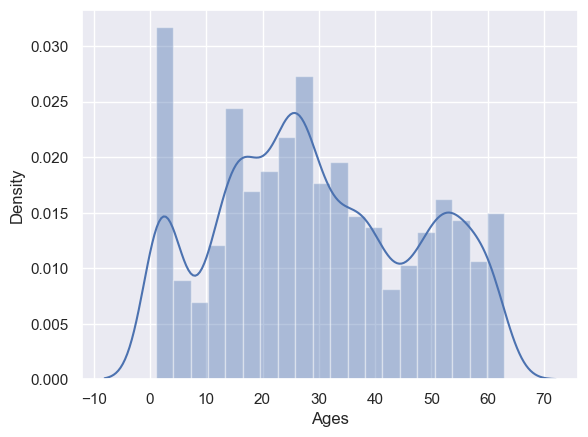

In [12]:
sns.distplot(df['Ages'],kde=True, bins=20)

C:\Users\ilhancuvelek\anaconda3\envs\new_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Genders', ylabel='count'>

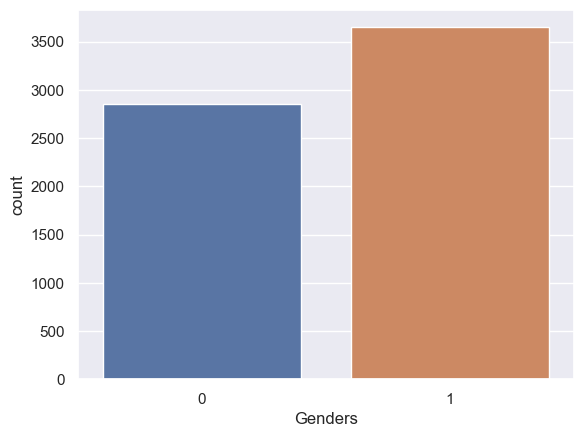

In [13]:
sns.countplot(df['Genders'])

C:\Users\ilhancuvelek\anaconda3\envs\new_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Genders', ylabel='count'>

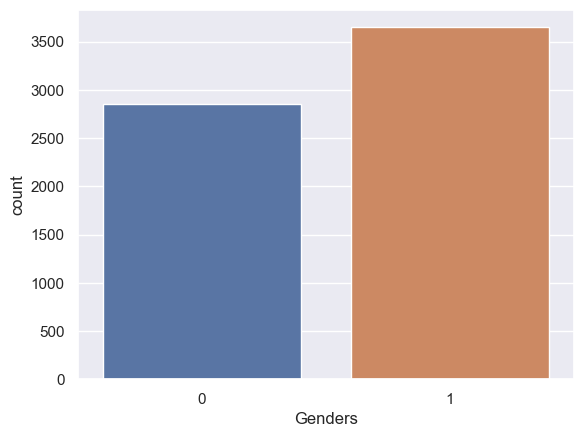

In [14]:
df = df[df['Genders'] != 3]
sns.countplot(df['Genders'])

In [15]:
x = []
y = []

for i in range(len(df)):
    df['Images'].iloc[i] = df['Images'].iloc[i].resize((200,200), Image.ANTIALIAS)
    ar = np.asarray(df['Images'].iloc[i])
    x.append(ar)
    agegen = [int(df['Ages'].iloc[i]), int(df['Genders'].iloc[i]),int(df['Races'].iloc[i])]
    y.append(agegen)
x = np.array(x)

C:\Users\ilhancuvelek\AppData\Local\Temp\ipykernel_2196\4077663472.py:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  df['Images'].iloc[i] = df['Images'].iloc[i].resize((200,200), Image.ANTIALIAS)
C:\Users\ilhancuvelek\AppData\Local\Temp\ipykernel_2196\4077663472.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Images'].iloc[i] = df['Images'].iloc[i].resize((200,200), Image.ANTIALIAS)


In [16]:
y_age = df['Ages']
y_gender = df['Genders']
y_race=df["Races"]
x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(x, y_age, test_size=0.2, stratify=y_age)
x_train_gender, x_test_gender, y_train_gender, y_test_gender = train_test_split(x, y_gender, test_size=0.2, stratify=y_gender)
x_train_race, x_test_race, y_train_race, y_test_race = train_test_split(x, y_race, test_size=0.2, stratify=y_race)

In [22]:
from keras.layers import BatchNormalization
agemodel = Sequential()
agemodel.add(Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Conv2D(64, (3,3), activation='relu'))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Conv2D(128, (3,3), activation='relu'))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Flatten())
agemodel.add(Dense(64, activation='relu'))
agemodel.add(Dropout(0.5))
agemodel.add(Dense(1, activation='relu'))

agemodel.compile(loss='mean_squared_error',
             optimizer=optimizers.Adam(lr=0.0001))

genmodel = Sequential()
genmodel.add(Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)))
genmodel.add(MaxPooling2D((2,2)))
genmodel.add(Conv2D(64, (3,3), activation='relu'))
genmodel.add(MaxPooling2D((2,2)))
genmodel.add(Conv2D(128, (3,3), activation='relu'))
genmodel.add(MaxPooling2D((2,2)))
genmodel.add(Flatten())
genmodel.add(Dense(64, activation='relu'))
genmodel.add(Dropout(0.5))
genmodel.add(Dense(1, activation='sigmoid'))

genmodel.compile(loss='binary_crossentropy',
             optimizer=optimizers.Adam(lr=0.0001),
             metrics=['accuracy'])

In [25]:
datagen = ImageDataGenerator(
      rescale=1./255., width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

train1 = datagen.flow(x_train_age, y_train_age, batch_size=64)

test1 = test_datagen.flow(
        x_test_age, y_test_age,
        batch_size=64)

history1 = agemodel.fit(train1, epochs=50, shuffle=True, validation_data=test1)

Epoch 1/50
82/82 [==============================] - 344s 4s/step - loss: 450.9493 - val_loss: 337.3299
Epoch 2/50
82/82 [==============================] - 344s 4s/step - loss: 356.3667 - val_loss: 332.0385
Epoch 3/50
82/82 [==============================] - 351s 4s/step - loss: 341.3503 - val_loss: 289.9171
Epoch 4/50
82/82 [==============================] - 355s 4s/step - loss: 318.3228 - val_loss: 253.6955
Epoch 5/50
82/82 [==============================] - 364s 4s/step - loss: 298.1653 - val_loss: 257.0558
Epoch 6/50
82/82 [==============================] - 354s 4s/step - loss: 268.4548 - val_loss: 207.4457
Epoch 7/50
82/82 [==============================] - 355s 4s/step - loss: 259.8788 - val_loss: 200.3353
Epoch 8/50
82/82 [==============================] - 355s 4s/step - loss: 253.1844 - val_loss: 199.6471
Epoch 9/50
82/82 [==============================] - 355s 4s/step - loss: 247.8377 - val_loss: 196.7258
Epoch 10/50
82/82 [==============================] - 357s 4s/step - loss:

In [26]:
datagen = ImageDataGenerator(
      rescale=1./255., width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

train2 = datagen.flow(x_train_gender, y_train_gender, batch_size=64)

test2 = test_datagen.flow(
        x_test_gender, y_test_gender,
        batch_size=64)

history2 = genmodel.fit(train2, epochs=50, shuffle=True, validation_data=test2)

Epoch 1/50
82/82 [==============================] - 338s 4s/step - loss: 0.6548 - accuracy: 0.5928 - val_loss: 0.5840 - val_accuracy: 0.7110
Epoch 2/50
82/82 [==============================] - 343s 4s/step - loss: 0.5974 - accuracy: 0.6855 - val_loss: 0.5548 - val_accuracy: 0.7095
Epoch 3/50
82/82 [==============================] - 342s 4s/step - loss: 0.5702 - accuracy: 0.7128 - val_loss: 0.5108 - val_accuracy: 0.7556
Epoch 4/50
82/82 [==============================] - 344s 4s/step - loss: 0.5435 - accuracy: 0.7324 - val_loss: 0.4752 - val_accuracy: 0.7817
Epoch 5/50
82/82 [==============================] - 342s 4s/step - loss: 0.5169 - accuracy: 0.7484 - val_loss: 0.4499 - val_accuracy: 0.7940
Epoch 6/50
82/82 [==============================] - 342s 4s/step - loss: 0.5061 - accuracy: 0.7653 - val_loss: 0.4310 - val_accuracy: 0.8086
Epoch 7/50
82/82 [==============================] - 344s 4s/step - loss: 0.4876 - accuracy: 0.7645 - val_loss: 0.4289 - val_accuracy: 0.8094
Epoch 8/50
82

In [27]:
agemodel.save('ageModel.h5')
genmodel.save('genderModel.h5')

In [17]:
race_model = Sequential()
race_model.add(Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)))
race_model.add(MaxPooling2D((2,2)))
race_model.add(Conv2D(32, (3,3), activation='relu'))
race_model.add(MaxPooling2D((2,2)))
race_model.add(Conv2D(64, (3,3), activation='relu'))
race_model.add(MaxPooling2D((2,2)))
race_model.add(Flatten())
race_model.add(Dense(128, activation='relu'))
race_model.add(Dense(5, activation='softmax'))

race_model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [18]:
datagen = ImageDataGenerator(
      rescale=1./255., width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

train4 = datagen.flow(x_train_race, y_train_race, batch_size=64)

test4 = test_datagen.flow(
        x_test_race, y_test_race,
        batch_size=64)

history4 = race_model.fit(train4, epochs=50, shuffle=True, validation_data=test4)

Epoch 1/50
82/82 [==============================] - 209s 2s/step - loss: 1.3712 - accuracy: 0.5346 - val_loss: 1.2849 - val_accuracy: 0.5580
Epoch 2/50
82/82 [==============================] - 199s 2s/step - loss: 1.1985 - accuracy: 0.5509 - val_loss: 1.1585 - val_accuracy: 0.5734
Epoch 3/50
82/82 [==============================] - 198s 2s/step - loss: 1.1369 - accuracy: 0.5711 - val_loss: 1.1718 - val_accuracy: 0.5596
Epoch 4/50
82/82 [==============================] - 194s 2s/step - loss: 1.0748 - accuracy: 0.5911 - val_loss: 1.0115 - val_accuracy: 0.6157
Epoch 5/50
82/82 [==============================] - 196s 2s/step - loss: 1.0490 - accuracy: 0.6011 - val_loss: 0.9861 - val_accuracy: 0.6188
Epoch 6/50
82/82 [==============================] - 191s 2s/step - loss: 1.0202 - accuracy: 0.6161 - val_loss: 0.9809 - val_accuracy: 0.6234
Epoch 7/50
82/82 [==============================] - 191s 2s/step - loss: 0.9746 - accuracy: 0.6336 - val_loss: 0.9158 - val_accuracy: 0.6480
Epoch 8/50
82

In [22]:
race_model.save('models/race_model.h5')

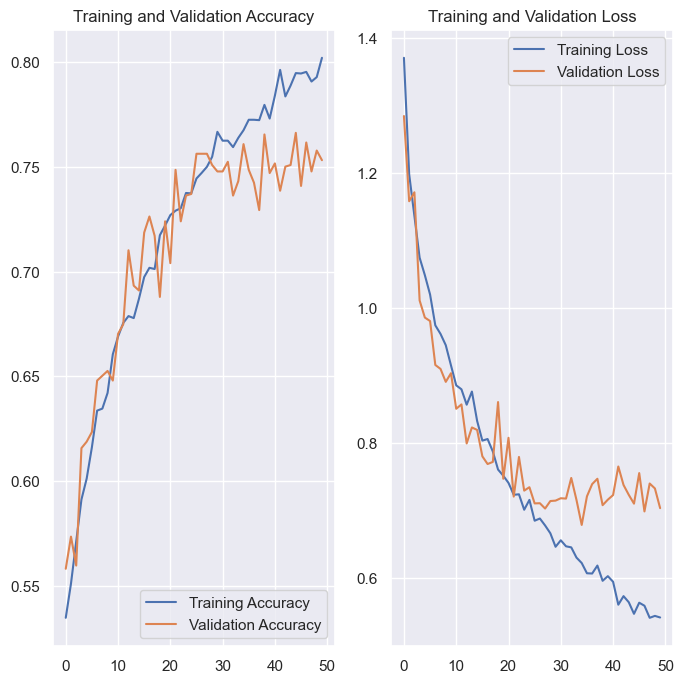

In [21]:
import matplotlib.pyplot as plt
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']

loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [7]:
from tensorflow.keras.models import load_model
raceModel=load_model('models/race_model.h5')
ageModel=load_model('models/ageModel.h5')
genderModel=load_model('models/genderModel.h5')
def process_and_predict(file):
    im = Image.open(file)
    width, height = im.size
    if width == height:
        im = im.resize((200,200), Image.ANTIALIAS)
    else:
        if width > height:
            left = width/2 - height/2
            right = width/2 + height/2
            top = 0
            bottom = height
            im = im.crop((left,top,right,bottom))
            im = im.resize((200,200), Image.ANTIALIAS)
        else:
            left = 0
            right = width
            top = 0
            bottom = width
            im = im.crop((left,top,right,bottom))
            im = im.resize((200,200), Image.ANTIALIAS)
            
    ar = np.asarray(im)
    ar = ar.astype('float32')
    ar /= 255.0
    ar = ar.reshape(-1, 200, 200, 3)
    
    age = ageModel.predict(ar)
    gender = np.round(genderModel.predict(ar))
    race=raceModel.predict(ar)
    race_dict = {0:"White",1:"Black",2:"Asian",3:"Indian",4:"Others "}
    if gender == 0:
        gender = 'male'
    elif gender == 1:
        gender = 'female'
    

    predictions = raceModel.predict(ar)
    score = tf.nn.softmax(predictions[0])
        
        
        
    print('Age:', int(age), '\n Gender:', gender, '\n Race:',race_dict[int(le.classes_[np.argmax(score)])])
    return im.resize((300,300), Image.ANTIALIAS)

1/1 [==============================] - ETA: 0s

C:\Users\ilhancuvelek\AppData\Local\Temp\ipykernel_8932\1898763653.py:9: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  im = im.resize((200,200), Image.ANTIALIAS)


1/1 [==============================] - 0s 56ms/step
Age: 26 
 Gender: female 
 Race: Asian


C:\Users\ilhancuvelek\AppData\Local\Temp\ipykernel_8932\1898763653.py:47: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  return im.resize((300,300), Image.ANTIALIAS)


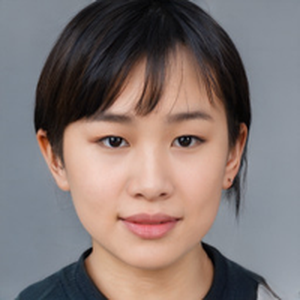

In [12]:
process_and_predict('test/asiafemale.jpg')

1/1 [==============================] - ETA: 0s

C:\Users\ilhancuvelek\AppData\Local\Temp\ipykernel_8932\1898763653.py:24: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  im = im.resize((200,200), Image.ANTIALIAS)


1/1 [==============================] - 0s 47ms/step
Age: 55 
 Gender: male 
 Race: Black


C:\Users\ilhancuvelek\AppData\Local\Temp\ipykernel_8932\1898763653.py:47: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  return im.resize((300,300), Image.ANTIALIAS)


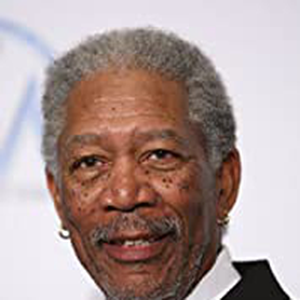

In [13]:
process_and_predict('test/morgan.jpg')

1/1 [==============================] - 0s 52ms/step


C:\Users\ilhancuvelek\AppData\Local\Temp\ipykernel_8932\1898763653.py:9: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  im = im.resize((200,200), Image.ANTIALIAS)


1/1 [==============================] - 0s 63ms/step
Age: 33 
 Gender: female 
 Race: White


C:\Users\ilhancuvelek\AppData\Local\Temp\ipykernel_8932\1898763653.py:47: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  return im.resize((300,300), Image.ANTIALIAS)


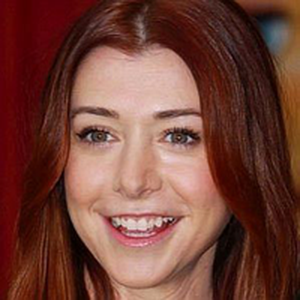

In [14]:
process_and_predict('test/hannigan-alyson-image.jpg')